Extracting /tmp/data\train-images-idx3-ubyte.gz
Extracting /tmp/data\train-labels-idx1-ubyte.gz
Extracting /tmp/data\t10k-images-idx3-ubyte.gz
Extracting /tmp/data\t10k-labels-idx1-ubyte.gz
55000 (55000, 784) (55000,)
(55000, 1)
5000 (5000, 784) (5000,)
(5000, 1)
(10000, 1)


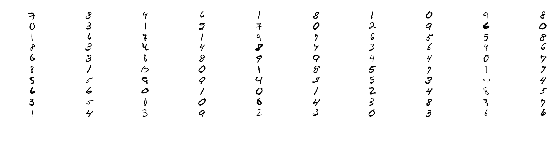

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib
import matplotlib.pyplot as plt

mnist = input_data.read_data_sets("/tmp/data",one_hot=False)

ntrain = mnist.train.num_examples
Xtrain = mnist.train.images
ytrain = mnist.train.labels
print(ntrain,Xtrain.shape,ytrain.shape)
ytrain = ytrain.reshape(ntrain,1)
print(ytrain.shape)

nvalidation = mnist.validation.num_examples
Xvalidation = mnist.validation.images
yvalidation = mnist.validation.labels
print(nvalidation,Xvalidation.shape,yvalidation.shape)
yvalidation = yvalidation.reshape(nvalidation,1)
print(yvalidation.shape)

ntest = mnist.test.num_examples
Xtest = mnist.test.images
ytest = mnist.test.labels
ytest = ytest.reshape(ntest,1)
print(ytest.shape)

def plot_image(image,shape=[28,28]):
    plt.imshow(image.reshape(shape),cmap="Greys",interpolation="nearest")
    plt.axis("off")
    
%matplotlib inline
plt.figure(figsize=(10,20))
for iteration in range(100):
    plt.subplot(100, 10, iteration + 1)
    plot_image(Xtrain[iteration,:])


In [6]:
# Ridge regression with SGD
n_inputs = 28 * 28

Xmean = np.mean(Xtrain,axis=0) # mean of data vector
ymean = np.mean(ytrain,axis=0) # bias of the model

X = tf.placeholder(tf.float32,[None, n_inputs])
Xm = X - Xmean # data centering
y = tf.placeholder(tf.float32,[None, 1       ])
XmT = tf.transpose(Xm)

lr = 0.0005 # learning rate
lam_val = 10 # regularization parameter

theta = tf.Variable(tf.random_normal([n_inputs,1])) # parameter of the linear model
yp = tf.matmul(Xm,theta)+ymean # predicted y
error = yp - y
gradient = tf.matmul(XmT,error) + lam_val * theta
training_op = tf.assign(theta, theta - lr * gradient)

y1 = tf.placeholder(tf.float32,[None, 1])
y2 = tf.placeholder(tf.float32,[None, 1])
acc = 100.0*tf.reduce_mean(tf.cast(tf.equal(y1,y2),tf.float32))

init = tf.global_variables_initializer()

n_epochs = 200
batch_size = 200

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        # compute model
        n_batches = mnist.train.num_examples // batch_size
        for iteration in range(n_batches):
            X_batch,y_batch = mnist.train.next_batch(batch_size)
            y_batch = y_batch.reshape(batch_size,1)
            sess.run(training_op, feed_dict={X:X_batch, y:y_batch})
        if epoch%10 == 0:
            theta_value = theta.eval()
            # prediction on training set
            yp_train = yp.eval(feed_dict={X:Xtrain, theta:theta_value})
            acc_train = acc.eval(feed_dict={y1:ytrain, y2:np.round(yp_train)})
            regerr_train = tf.reduce_mean(tf.square(yp_train-ytrain)).eval()
        
            # prediction on validation set
            yp_validation = yp.eval(feed_dict={X:Xvalidation, theta:theta_value})
            acc_validation = acc.eval(feed_dict={y1:yvalidation, y2:np.round(yp_validation)})
            regerr_validation = tf.reduce_mean(tf.square(yp_validation-yvalidation)).eval()        
                    
            print(regerr_train, regerr_validation, acc_train, acc_validation)
    
    # Now that the model is trained, it is the test time!
    yp_test = yp.eval(feed_dict={X:Xtest, theta:theta_value})
    acc_test = acc.eval(feed_dict={y1:ytest, y2:np.round(yp_test)})
    print(acc_test)

3.63108 3.51895 18.5745 18.82
3.48369 3.34103 20.4655 20.42
3.47114 3.3298 19.0582 19.94
3.46099 3.32164 18.7491 19.22
3.47444 3.34111 20.96 20.86
3.47009 3.31647 18.7673 18.84
3.47242 3.30969 18.6873 19.64
3.4706 3.32682 19.6473 20.16
3.47216 3.34229 18.7509 19.68
3.48221 3.33375 18.8727 19.68
3.46254 3.30953 19.0709 20.02
3.48932 3.37185 18.74 19.3
3.46789 3.29944 19.8927 20.64
3.50796 3.40074 18.7691 19.5
3.46735 3.33268 19.4618 20.06
3.51524 3.34539 17.7891 18.56
3.48109 3.32596 19.6545 20.3
3.47832 3.33586 19.1982 18.9
3.47479 3.30569 18.7218 18.92
3.50198 3.35657 20.78 20.62
19.89


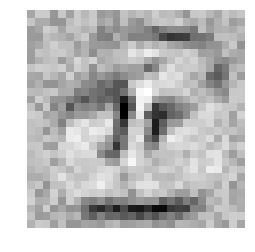

In [19]:
import matplotlib
import matplotlib.pyplot as plt

def plot_image(image,shape=[28,28]):
    plt.imshow(image.reshape(shape),cmap="Greys",interpolation="nearest")
    plt.axis("off")
    
%matplotlib inline
plot_image(theta_value)